In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize']=14
matplotlib.rcParams['xtick.labelsize']=12
matplotlib.rcParams['ytick.labelsize']=12
matplotlib.rcParams['text.color']='k'

In [3]:
#read the dataset
furniture = pd.read_csv("Super_Store_data.csv", encoding = 'cp1252')

In [4]:
#run the 1st 6 rows and all coulmns of the dataset
furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [5]:
#Checking the dimension of the time series data
furniture.shape

(2121, 21)

In [6]:
#Checking the str/character type variable
furniture.describe(include = 'O')

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121,2121
unique,1764,889,960,4,707,707,3,1,371,48,4,375,1,4,380
top,US-2015-129007,9/5/2016,12/6/2017,Standard Class,SV-20365,Seth Vernon,Consumer,United States,New York City,California,West,FUR-FU-10004270,Furniture,Furnishings,KI Adjustable-Height Table
freq,4,10,10,1248,15,15,1113,2121,192,444,707,16,2121,957,18


In [7]:
#Checking the numeric and continuous variable
furniture.describe(include = 'float64')

,Sales,Discount,Profit
count,2121.000000,2121.000000,2121.000000
mean,349.834887,0.173923,8.699327
std,503.179145,0.181547,136.049246
min,1.892000,0.000000,-1862.312400
25%,47.040000,0.000000,-12.849000
50%,182.220000,0.200000,7.774800
75%,435.168000,0.300000,33.726600
max,4416.174000,0.700000,1013.127000


In [8]:
#Checking the numeric and integer variable
furniture.describe(include = 'int64')

,Row ID,Postal Code,Quantity
count,2121.000000,2121.000000,2121.000000
mean,5041.643564,55726.556341,3.785007
std,2885.740258,32261.888225,2.251620
min,1.000000,1040.000000,1.000000
25%,2568.000000,22801.000000,2.000000
50%,5145.000000,60505.000000,3.000000
75%,7534.000000,90032.000000,5.000000
max,9991.000000,99301.000000,14.000000


In [9]:
#Info command to have a glance on the data types and the missing values
furniture.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [10]:
#Check the time spam
furniture['Order Date'].min(), furniture['Order Date'].max()

('1/1/2017', '9/9/2017')

In [11]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

furniture.drop(cols, axis = 1, inplace = True)

furniture = furniture.sort_values('Order Date')

#checking null values
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [12]:
furniture.head()

,Order Date,Sales
845,1/1/2017,474.430
1707,1/1/2017,141.420
1708,1/1/2017,310.744
179,1/1/2017,48.896
181,1/10/2014,51.940


In [13]:
furniture = furniture.groupby("Order Date")['Sales'].sum().reset_index()

In [14]:
furniture.head()

,Order Date,Sales
0,1/1/2017,975.490
1,1/10/2014,51.940
2,1/10/2015,1018.104
3,1/10/2016,104.770
4,1/11/2014,9.940


In [15]:
#using the pd to_datetime we convert the order of date format so that python treat date as date not object
furniture["Order Date"] = pd.to_datetime(furniture["Order Date"])
furniture.set_index("Order Date", inplace = True)
furniture.index

DatetimeIndex(['2017-01-01', '2014-01-10', '2015-01-10', '2016-01-10',
               '2014-01-11', '2016-01-11', '2017-01-12', '2014-01-13',
               '2015-01-13', '2017-01-13',
               ...
               '2014-09-07', '2015-09-07', '2017-09-07', '2014-09-08',
               '2015-09-08', '2016-09-08', '2017-09-08', '2014-09-09',
               '2016-09-09', '2017-09-09'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [16]:
furniture.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889 entries, 2017-01-01 to 2017-09-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sales   889 non-null    float64
dtypes: float64(1)
memory usage: 13.9 KB


In [17]:
y = furniture["Sales"].resample('MS').mean() #MS mean Month Start

In [18]:
y['2017']

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

In [19]:
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

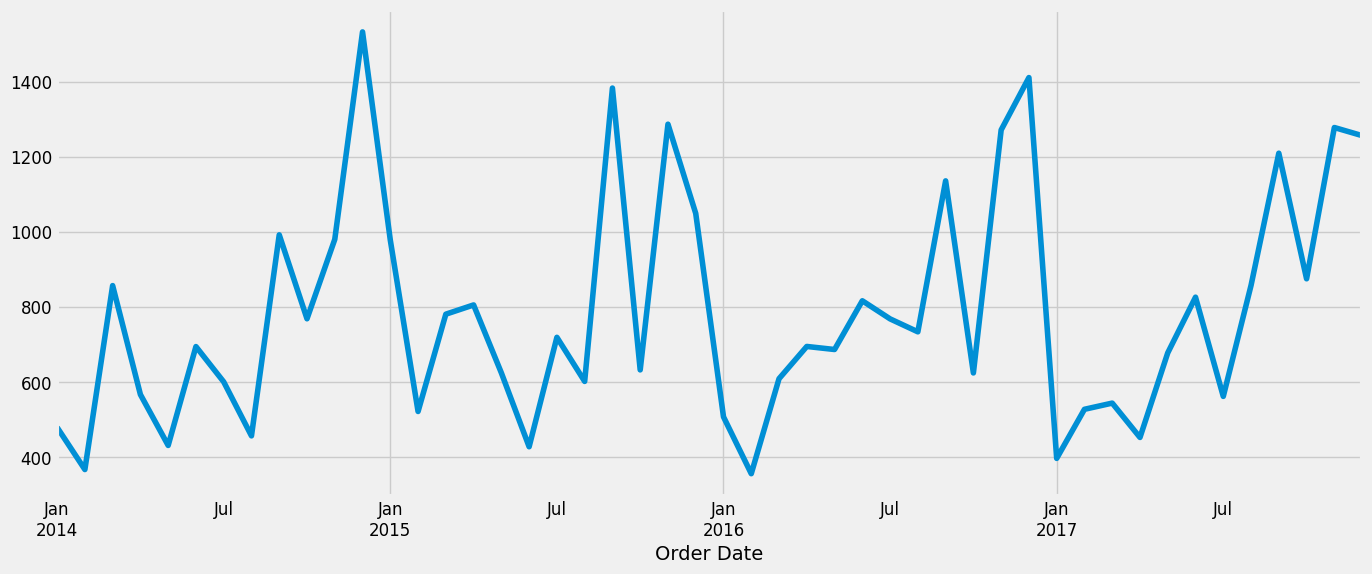

In [20]:
y.plot(figsize=(15,6))
plt.show()

In [21]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller

result = adfuller(y)

print("ADF Statistic: %f" % result[0]) #%f means float 
      
print('P-value: %f' % result[1])  
      
print('Critical Values:')

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value)) #%.3f means float with 3 decimal point

ADF Statistic: -5.191070
P-value: 0.000009
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610


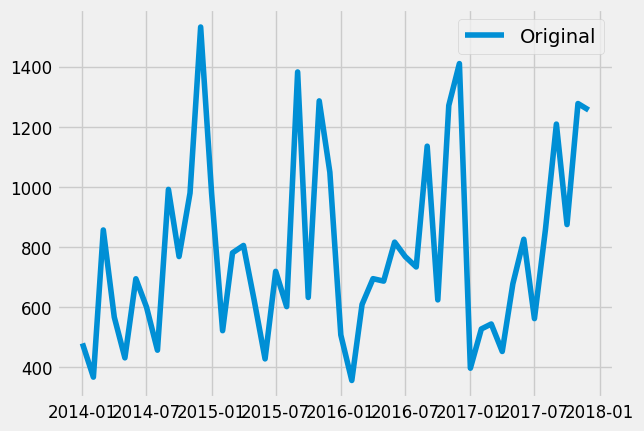

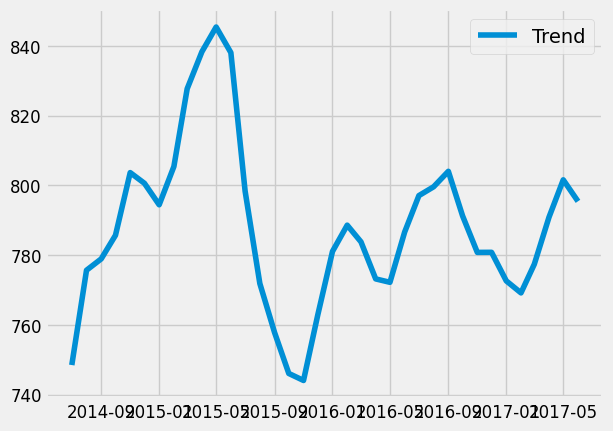

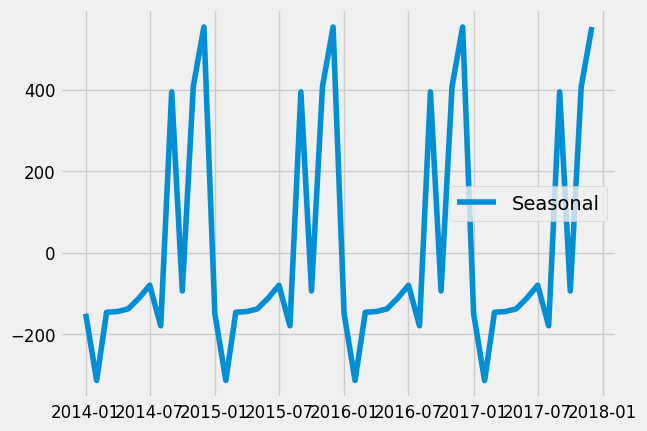

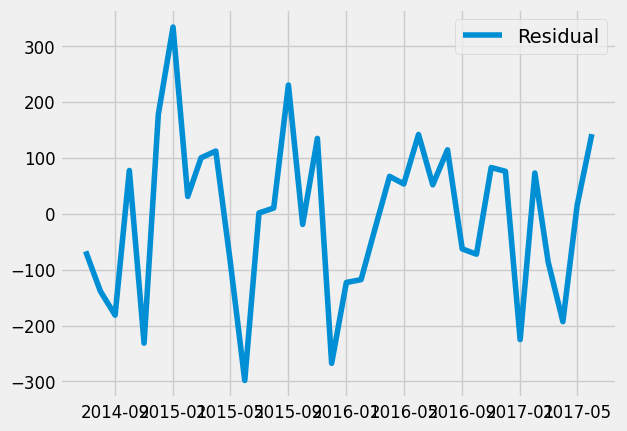

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(y)
plt.plot(y, label = 'Original')
plt.legend(loc = 'best')


trend  = decomposition.trend
plt.show()
plt.plot(trend, label = "Trend")
plt.legend(loc  = "best")

seasonal = decomposition.seasonal
plt.show()
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')

residual = decomposition.resid
plt.show()
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')

In [23]:
p = d = q  = range(0, 2) 
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(X[0], X[1], X[2], 12) for X in list(itertools.product(p, d, q))]
print('Examples of paramter combination for Seasonal ARIMA....')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of paramter combination for Seasonal ARIMA....
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [24]:
from pylab import rcParams #Param means Parameter
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order=param,
seasonal_order=param_seasonal,
enforce_stationarity=False,
enforce_invertibility= False)
            results = mod.fit()
            print('ARIMA{}x{}12- AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12- AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12- AIC:1415.6086205500812
ARIMA(0, 0, 0)x(0, 1, 0, 12)12- AIC:477.7170130920111
ARIMA(0, 0, 0)x(0, 1, 1, 12)12- AIC:302.27028997936003
ARIMA(0, 0, 0)x(1, 0, 0, 12)12- AIC:497.23144334183365
ARIMA(0, 0, 0)x(1, 0, 1, 12)12- AIC:1240.8119461878284
ARIMA(0, 0, 0)x(1, 1, 0, 12)12- AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12- AIC:304.24882803008137
ARIMA(0, 0, 1)x(0, 0, 0, 12)12- AIC:720.9252270758095
ARIMA(0, 0, 1)x(0, 0, 1, 12)12- AIC:2719.190007642286
ARIMA(0, 0, 1)x(0, 1, 0, 12)12- AIC:466.56074298091437
ARIMA(0, 0, 1)x(0, 1, 1, 12)12- AIC:291.6261389673287
ARIMA(0, 0, 1)x(1, 0, 0, 12)12- AIC:499.5665720564813
ARIMA(0, 0, 1)x(1, 0, 1, 12)12- AIC:2421.1476843900346
ARIMA(0, 0, 1)x(1, 1, 0, 12)12- AIC:319.9884876946865
ARIMA(0, 0, 1)x(1, 1, 1, 12)12- AIC:291.8725576458952
ARIMA(0, 1, 0)x(0, 0, 0, 12)12- AIC:677.8947668414504
ARIMA(0, 1, 0)x(0, 0, 1, 12)12- AIC:1320.5584552230434
ARIMA(0, 1, 0)x(0, 1

In [25]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0146      0.342      0.043      0.966      -0.655       0.684
ma.L1         -1.0000      0.360     -2.781      0.005      -1.705      -0.295
ar.S.L12      -0.0253      0.042     -0.609      0.543      -0.107       0.056
sigma2      2.958e+04   1.22e-05   2.43e+09      0.000    2.96e+04    2.96e+04


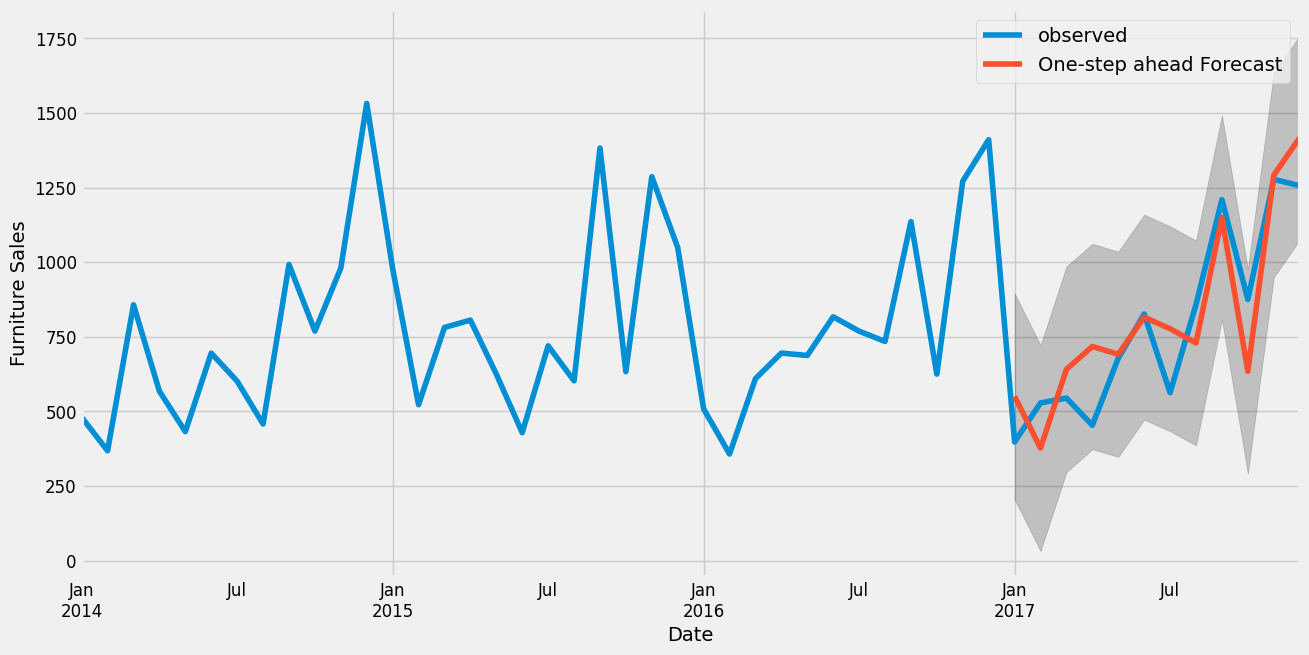

In [26]:
#set forecasts to start at 2017–01–01 to the end of the data to forecast
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast',alpha=1, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [27]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 151.64


            lower Sales  upper Sales
2018-01-01    66.439564   751.053309
2018-02-01   191.940364   876.931466
2018-03-01   214.443164   899.438796
2018-04-01   127.554340   812.550038
2018-05-01   346.657582  1031.653280
2018-06-01   494.346907  1179.342605
2018-07-01   235.873417   920.869116
2018-08-01   522.881997  1207.877696
2018-09-01   875.774909  1560.770608
2018-10-01   537.149982  1222.145681
2018-11-01   945.782266  1630.777965
2018-12-01   928.336169  1613.331868
2019-01-01   -66.357446   904.538506


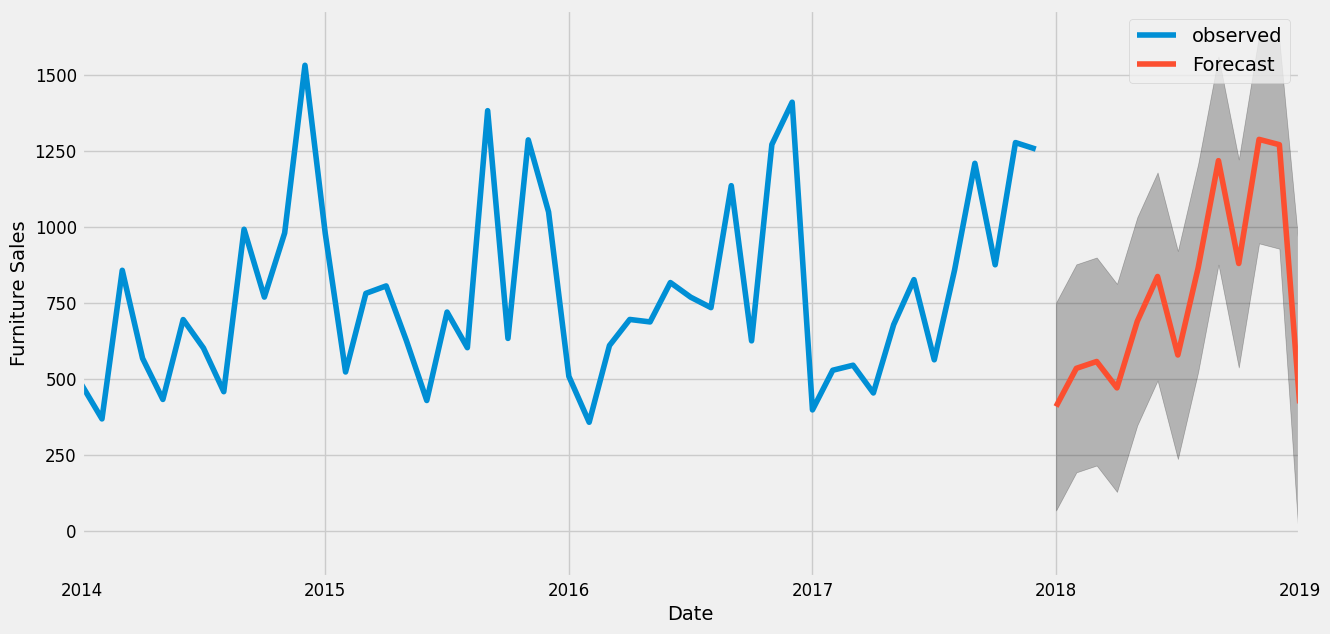

In [28]:
pred_uc = results.get_forecast(steps=13)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
print(pred_ci)
plt.legend()
plt.show()